# Group 2. Diterpene project

## Ege Yolsal, Andrei Brasoveanu, Darius Gražulis
### 01634257, 12045444, 12045116

# Part 1.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler  
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics

In [2]:
df = pd.read_csv("diterpene_shuf.csv")
cols = df.columns

For our practical coursework assignment, you will be working on a problem in natural product chemistry. More precisely, we provide you with a dataset comprising nuclear magnetic resonance (NMR) spectroscopy data for a certain set of organic compounds, so-called diterpenes. Diterpenes belong to the class of terpenes, which are molecules with a carbon skeleton and the formula (C5H8)n. They constitute a major component of essential oils in certain plants and often exhibit interesting medical properties. NMR spectroscopy is a commonly employed method to determine the chemical structure of a compound, something that is referred to as structure elucidation. In NMR experiments, molecules are placed in a strong magnetic field, resulting in the molecules resonating at a specific frequency. These frequencies can then be used to infer information about the molecules' chemical structures. The full dataset comprises 1503 spectra of diterpenes, classified into 23 different classes according to their skeleton structure. For a more detailed description of the classification task and the data, please refer to the original paper by Dzeroski et al. as well as a summary thereof.



Each instance is described by:

    the first four numbers are expert designed features (you can ignore them for the classification task),
    the next item is an ID,
    then we have a number of resonance frequencies with their "multiplicity", and
    finally the class.



In [3]:
df.head()

,a0,a1,a2,a3,a4,a5,a6,a7,a8,a9,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,a45c
0,2,4,8,6,v1493,t,139.2,q,33.2,d,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,2,4,8,6,v1255,d,144.0,q,66.7,d,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,2,4,8,6,v2194,d,30.7,t,26.8,t,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,3,4,9,4,v2021,t,37.2,t,17.4,q,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,3,4,9,4,v1051,q,12.2,d,154.6,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


In [4]:
df = df.drop(["a0","a1","a2","a3"], axis=1)
df = df.rename(columns={"a4": "ID", "a45c": "Class"})

In [5]:
df.head()

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,v1493,t,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,d,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,t,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,d,154.6,t,18.7,t,37.1,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


<AxesSubplot:xlabel='Class', ylabel='count'>

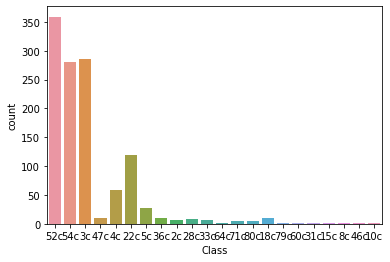

In [6]:
sns.countplot(x = 'Class', data=df)

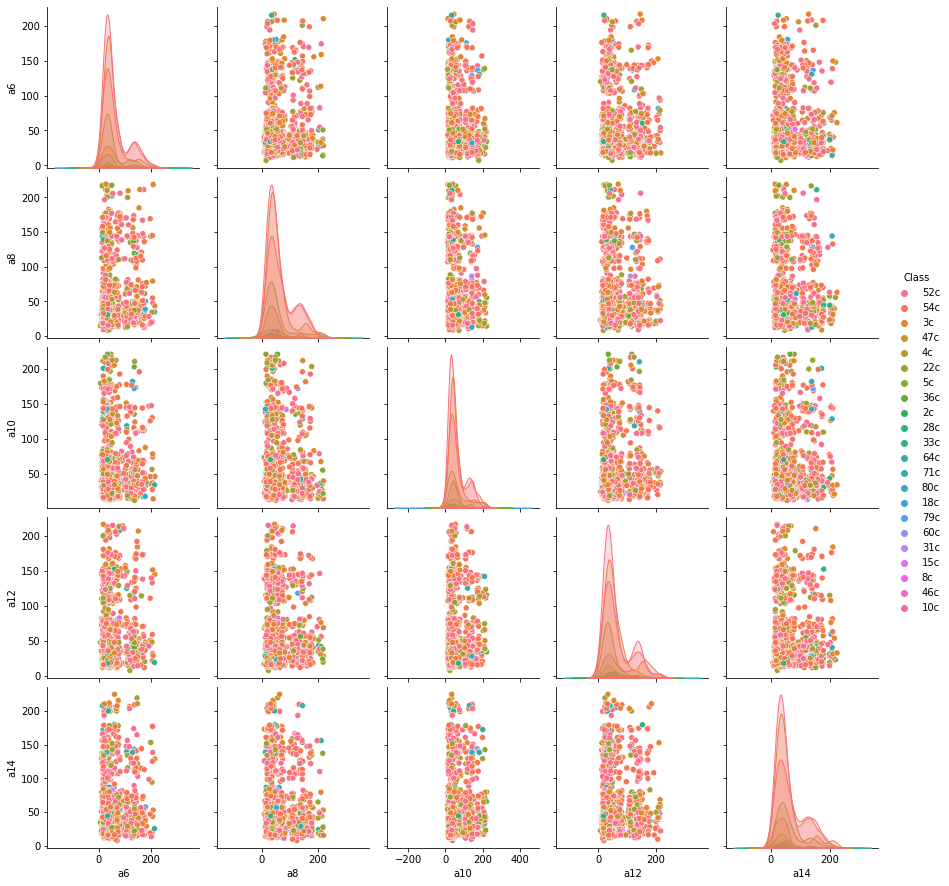

In [7]:
tmp = df[["a5", 'a6', "a7", "a8", "a9" , "a10", "a11" , "a12", "a13" ,"a14", "Class"]]
sns.pairplot(tmp, hue="Class")

In [8]:
df.shape

(1202, 42)

In [9]:
df.a5.unique()

array(['t', 'd', 'q', 's'], dtype=object)

In [10]:
df.Class.unique()

array(['52c', '54c', '3c', '47c', '4c', '22c', '5c', '36c', '2c', '28c',
       '33c', '64c', '71c', '80c', '18c', '79c', '60c', '31c', '15c',
       '8c', '46c', '10c'], dtype=object)

In [11]:
df.describe()

,a6,a8,a10,a12,a14,a16,a18,a20,a22,a24,a26,a28,a30,a32,a34,a36,a38,a40,a42,a44
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,56.387155,59.147687,59.999551,58.874193,59.536389,59.597471,57.309401,58.728378,55.568128,57.278544,58.794725,56.415308,61.136672,59.793536,58.655524,60.627945,58.849384,57.287329,60.231140,57.614401
std,43.868545,45.930797,46.909051,45.465840,46.522244,45.921470,43.398889,44.909447,43.476958,45.148903,46.448512,44.489723,47.351395,44.805028,45.697774,46.396705,46.498059,44.742240,47.950173,44.897128
min,7.300000,7.900000,11.600000,7.500000,7.700000,7.500000,7.600000,9.200000,7.500000,6.800000,11.800000,11.600000,8.000000,7.600000,2.400000,7.800000,7.900000,8.100000,7.900000,7.700000
25%,27.800000,28.200000,27.725000,28.425000,27.700000,28.725000,27.875000,28.302500,28.050000,28.100000,26.625000,27.025000,28.550000,30.300000,28.700000,30.625000,28.300000,27.302500,28.225000,28.225000
50%,39.600000,41.400000,41.200000,40.400000,41.300000,41.000000,39.925000,40.500000,39.600000,40.400000,40.215000,39.500000,41.400000,41.200000,40.700000,42.000000,40.050000,39.700000,40.700000,40.400000
75%,66.700000,71.800000,73.187500,72.700000,72.975000,72.175000,71.975000,72.100000,64.160000,65.775000,71.900000,65.375000,74.600000,72.600000,69.900000,72.575000,71.175000,68.825000,72.075000,70.200000
max,216.630000,219.100000,220.700000,216.900000,224.700000,221.250000,223.000000,222.700000,222.100000,218.300000,222.500000,215.270000,220.200000,216.900000,218.000000,216.400000,224.500000,216.100000,217.460000,219.300000


In [12]:
df.isnull().values.any()

False

<AxesSubplot:>

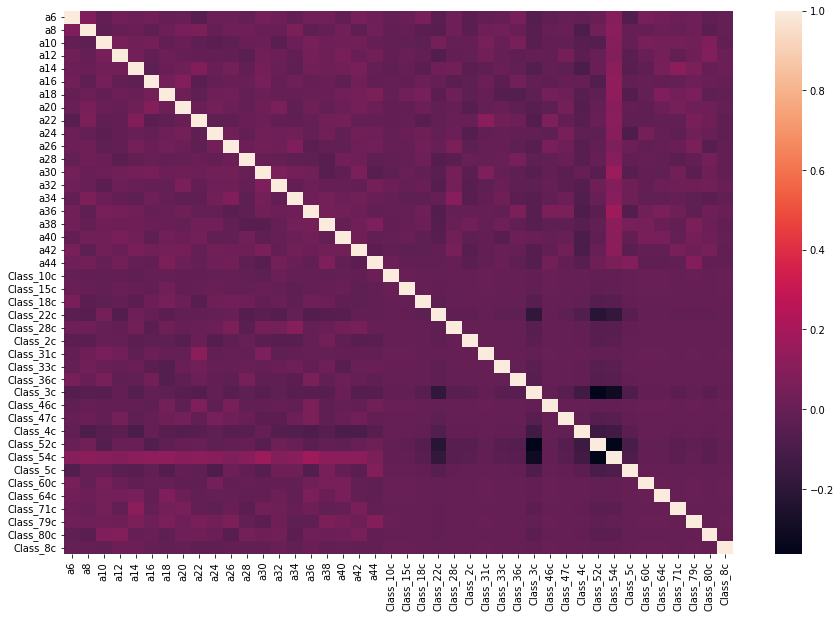

In [13]:
df_target_onehot = pd.get_dummies(df, columns=['Class'])
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_target_onehot.corr())

# Neural Network (with linear layers) - pytorch

In [14]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

class DieterDataset():

    def __init__(self, csv_file):
        """Initializes instance of class DieterDataset.
        Args:
            csv_file (str): Path to the csv file with the dieter data.
        """
        df = pd.read_csv(csv_file)

        # Grouping variable names
        self.categorical = ["a5", "a7", "a9", 
                            "a11", "a13", "a15", "a17", "a19", 
                            "a21", "a23", "a25", "a27", "a29", 
                            "a31", "a33", "a35", "a37", "a39"]
        self.target = "math score"

        # One-hot encoding of categorical variables
        self.students_frame = pd.get_dummies(df, prefix=self.categorical)

        # Save target and predictors
        self.X = self.students_frame.drop(self.target, axis=1)
        self.y = self.students_frame[self.target]

    def __len__(self):
        return len(self.students_frame)

    def __getitem__(self, idx):
        # Convert idx from tensor to list due to pandas bug (that arises when using pytorch's random_split)
        if isinstance(idx, torch.Tensor):
            idx = idx.tolist()

        return [self.X.iloc[idx].values, self.y[idx]]

# Neural Network using pytorch-tabular

In [15]:
# this cell is used to create at least one sample from each class in both training and test sets
# there are some classes which only have one sample present in the dataset so we cannot stratify otherwise
def get_min_required_rows(test_size=0.2):
    return 1 / test_size

class_to_counts = df['Class'].value_counts()
df['Sameclass'] = df['Class'].apply(lambda y: class_to_counts[y])
    
min_required_rows = get_min_required_rows(0.2)
copy_rows = df[df['Sameclass'] < min_required_rows].copy(deep=True)
valid_rows = df[df['Sameclass'] >= min_required_rows].copy(deep=True)
              
X = valid_rows['ID'].tolist()
y = valid_rows['Class'].tolist()
    
X_train, X_test, _, _ = train_test_split(X, y, test_size=0.2, random_state=43, stratify=y)


X_test = X_test + copy_rows['ID'].tolist()
X_train = X_train + copy_rows['ID'].tolist()

df.drop(['Sameclass'], axis=1, inplace=True)

test_df = df[df['ID'].isin(X_test)].copy(deep=True)
train_df = df[df['ID'].isin(X_train)].copy(deep=True)

print (f"number of rows in the original dataset: {len(df)}")

test_prop = round(len(test_df) / len(df) * 100, 2)
train_prop = round(len(train_df) / len(df) * 100, 2)
print (f"number of rows in the splits: {len(train_df)} ({train_prop}%), {len(test_df)} ({test_prop}%)")

number of rows in the original dataset: 1202
number of rows in the splits: 963 (80.12%), 249 (20.72%)


In [16]:
Counter(train_df['Class'])

Counter({'52c': 287,
         '54c': 224,
         '3c': 228,
         '47c': 8,
         '4c': 47,
         '22c': 95,
         '5c': 22,
         '36c': 8,
         '2c': 6,
         '28c': 6,
         '33c': 6,
         '64c': 1,
         '71c': 4,
         '80c': 4,
         '18c': 8,
         '79c': 2,
         '60c': 1,
         '31c': 1,
         '15c': 2,
         '8c': 1,
         '46c': 1,
         '10c': 1})

In [17]:
from collections import Counter
Counter(test_df['Class'])

Counter({'54c': 56,
         '52c': 72,
         '4c': 12,
         '3c': 57,
         '5c': 6,
         '36c': 2,
         '22c': 24,
         '64c': 1,
         '71c': 1,
         '2c': 1,
         '28c': 2,
         '47c': 2,
         '79c': 2,
         '18c': 2,
         '60c': 1,
         '31c': 1,
         '15c': 2,
         '33c': 1,
         '8c': 1,
         '46c': 1,
         '10c': 1,
         '80c': 1})

In [18]:
train_df = train_df.drop(['ID'], axis = 1)

test_df = test_df.drop(['ID'], axis = 1)

In [19]:
train_df

,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,t,139.2,q,33.2,d,30.7,d,49.6,t,38.6,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,d,144.0,q,66.7,d,46.2,t,32.7,q,19.1,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
3,t,37.2,t,17.4,q,16.7,s,58.1,t,41.6,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,q,12.2,d,154.6,t,18.7,t,37.1,t,79.1,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c
5,q,33.3,q,173.8,d,146.0,q,107.8,s,38.9,...,55.5,t,56.1,t,53.9,s,44.8,t,37.5,52c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,q,18.8,t,32.5,d,143.1,q,15.7,t,117.9,...,172.1,q,62.3,d,36.1,t,27.0,s,38.8,54c
1198,q,60.6,t,29.3,t,38.7,d,47.6,q,16.4,...,59.1,s,39.7,d,142.6,q,18.8,d,36.2,54c
1199,q,166.1,q,62.5,s,34.6,t,37.9,q,22.6,...,44.5,d,55.6,d,147.3,q,107.0,t,47.1,52c
1200,t,36.5,d,46.4,t,27.5,t,35.5,q,15.7,...,17.3,t,120.4,q,17.8,d,144.4,t,35.9,54c


In [20]:
test_df

,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
2,d,30.7,t,26.80,t,41.20,t,139.30,q,19.80,...,16.70,t,35.40,q,65.80,s,42.40,d,139.80,54c
9,d,93.5,q,111.00,t,34.80,t,214.50,d,57.50,...,18.10,s,41.70,q,16.70,t,143.90,q,27.60,52c
15,s,39.6,q,16.02,s,50.49,t,17.57,t,32.14,...,37.41,t,31.45,t,19.03,t,71.58,q,17.78,4c
16,t,156.7,d,144.20,q,195.50,t,29.30,s,55.90,...,202.80,q,25.60,d,35.50,t,126.50,t,73.00,54c
19,t,19.7,s,36.20,t,28.90,t,42.80,q,11.70,...,42.20,q,110.30,d,74.80,q,28.80,d,55.90,52c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,q,17.8,t,17.80,t,56.50,s,48.10,t,17.80,...,43.70,q,18.90,s,39.00,t,35.30,s,37.60,3c
1176,s,52.1,s,47.70,t,212.20,s,38.50,t,142.50,...,127.10,t,34.50,d,53.10,t,37.00,t,215.80,22c
1178,q,15.7,q,171.30,d,77.10,d,42.50,s,42.40,...,28.90,d,36.70,q,171.70,q,21.00,t,76.00,54c
1183,t,74.6,q,15.40,q,17.30,t,143.70,t,20.60,...,35.00,t,44.60,t,108.20,s,46.50,t,138.30,54c


In [21]:
from pytorch_tabular import TabularModel
from pytorch_tabular.models import CategoryEmbeddingModelConfig
from pytorch_tabular.config import DataConfig, OptimizerConfig, TrainerConfig, ExperimentConfig
from torchmetrics.functional import f1

data_config = DataConfig(
    target=['Class'],
    
    # frequencies
    continuous_cols = ["a6", "a8", "a10", 
                        "a12", "a14", "a16", "a18", "a20", 
                        "a22", "a24", "a26", "a28", "a30", 
                        "a32", "a34", "a36", "a38", "a40",
                        "a42", "a44"], 
    
    # multiplicities
    categorical_cols = ["a5", "a7", "a9", 
                        "a11", "a13", "a15", "a17", "a19", 
                        "a21", "a23", "a25", "a27", "a29", 
                        "a31", "a33", "a35", "a37", "a39",
                        "a41", "a43"]
)

trainer_config = TrainerConfig(
    auto_lr_find = True, 
    batch_size = 32,
    max_epochs = 100 # index of the GPU to use. 0 means CPU
)

optimizer_config = OptimizerConfig()

model_config = CategoryEmbeddingModelConfig(
    task="classification",
    layers="80-23",  # Number of nodes in each layer
    activation="ReLU", # Activation between each layers
    learning_rate = 1e-3
)

# weighted loss used because of the imbalance in class distribution
from pytorch_tabular.utils import get_class_weighted_cross_entropy
weighted_loss = get_class_weighted_cross_entropy(train_df["Class"].values.ravel(), mu=0.1)

tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config,
)

# training of the model, test set used only for validation here
# f1 score as metric
tabular_model.fit(train=train_df, loss = weighted_loss, validation = test_df, metrics = [f1])
# result = tabular_model.evaluate(test_df)

Global seed set to 42
/home/darius/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/distributed.py:69: UserWarning: Checkpoint directory saved_models exists and is not empty.
  warnings.warn(*args, **kwargs)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | custom_loss            | CrossEntropyLoss    | 0     
1 | embedding_layers       | ModuleList          | 300   
2 | normalizing_batch_norm | BatchNorm1d         | 40    
3 | backbone               | FeedForwardBackbone | 8.3 K 
4 | output_layer           | Linear              | 528   
---------------------------------------------------------------
9.2 K     Trainable params
0         Non-trainable params
9.2 K     Total params
0.037     Total estimated model params size (MB)
/home/darius/.local/lib/python3.10/site-packages/pytorch_lightning/utilities/distributed.py:69:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------


Restored states from the checkpoint file at /home/darius/TUWIEN_DATA_SCIENCE/2022S/Theoretical_Foundations_and_Research_Topics_in_Machine_Learning/lr_find_temp_model.ckpt
Learning rate set to 0.02089296130854041

  | Name                   | Type                | Params
---------------------------------------------------------------
0 | custom_loss            | CrossEntropyLoss    | 0     
1 | embedding_layers       | ModuleList          | 300   
2 | normalizing_batch_norm | BatchNorm1d         | 40    
3 | backbone               | FeedForwardBackbone | 8.3 K 
4 | output_layer           | Linear              | 528   
---------------------------------------------------------------
9.2 K     Trainable params
0         Non-trainable params
9.2 K     Total params
0.037     Total estimated model params size (MB)


--------------------------------------------------------------------------------
DATALOADER:0 VALIDATE RESULTS
{}
--------------------------------------------------------------------------------


Validation sanity check: 0it [00:00, ?it/s]

Global seed set to 42


Training: 6it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

# LOGISTIC REGRESSION

In [22]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

train_X = train_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12','a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20','a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28','a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36','a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]

test_X = df.iloc[1050:,1:-1]



test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])

test_X = test_X[['a5_s', 'a5_t', 'a5_d', 'a5_q', 'a6','a7_s', 'a7_t', 'a7_d', 'a7_q', 'a8','a9_s', 'a9_t', 'a9_d', 'a9_q', 'a10','a11_s', 'a11_t', 'a11_d', 'a11_q', 'a12','a13_s', 'a13_t', 'a13_d', 'a13_q', 'a14','a15_s', 'a15_t', 'a15_d', 'a15_q', 'a16','a17_s', 'a17_t', 'a17_d', 'a17_q', 'a18','a19_s', 'a19_t', 'a19_d', 'a19_q', 'a20','a21_s', 'a21_t', 'a21_d', 'a21_q', 'a22','a23_s', 'a23_t', 'a23_d', 'a23_q', 'a24','a25_s', 'a25_t', 'a25_d', 'a25_q', 'a26','a27_s', 'a27_t', 'a27_d', 'a27_q', 'a28','a29_s', 'a29_t', 'a29_d', 'a29_q', 'a30','a31_s', 'a31_t', 'a31_d', 'a31_q', 'a32','a33_s', 'a33_t', 'a33_d', 'a33_q', 'a34','a35_s', 'a35_t', 'a35_d', 'a35_q', 'a36','a37_s', 'a37_t', 'a37_d', 'a37_q', 'a38','a39_s', 'a39_t', 'a39_d', 'a39_q', 'a40','a41_s', 'a41_t', 'a41_d', 'a41_q', 'a42','a43_s', 'a43_t', 'a43_d', 'a43_q', 'a44'
]]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.92544832e-04, 5.19153953e-05, 2.05167145e-03, ...,
        1.74328419e-10, 1.42059203e-05, 2.43335842e-03],
       [5.11386605e-06, 1.09791270e-03, 3.20068250e-03, ...,
        1.10403409e-17, 9.14026021e-10, 1.88607253e-01],
       [6.28451790e-04, 2.16816643e-05, 3.71529264e-02, ...,
        2.56901794e-06, 1.19890759e-08, 1.12613546e-04],
       ...,
       [8.48164596e-05, 8.44890344e-07, 1.65558439e-03, ...,
        3.19741242e-12, 6.66997469e-10, 5.90756851e-07],
       [2.13484594e-05, 6.58919584e-06, 1.31111378e-04, ...,
        3.75435649e-05, 1.83215503e-03, 1.47799852e-05],
       [2.77428484e-07, 7.94768326e-04, 6.58694489e-06, ...,
        5.08743143e-05, 1.51584163e-14, 4.95051442e-04]])

In [23]:
tmp = df[df["Class"].isin(["52c","54c","3c"])]

accuracy_score(test_Y, predictions)

0.28289473684210525

In [24]:
tmp = df[df["Class"].isin(["22c"])]
tmp

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
17,v931,t,22.90,s,38.80,t,147.70,t,19.10,d,...,128.10,t,19.40,q,34.50,s,38.80,t,39.70,22c
20,v1587,s,46.40,q,177.40,t,202.90,t,40.20,d,...,21.70,t,142.70,s,44.00,t,121.90,q,21.50,22c
34,v1083,d,43.50,t,23.90,q,33.50,q,22.70,q,...,24.40,t,33.50,s,49.80,t,18.80,t,44.10,22c
47,v1583,d,48.30,t,38.50,q,178.00,q,22.30,d,...,150.10,s,38.50,s,35.00,t,19.30,q,28.10,22c
57,v1263,d,38.83,q,70.90,t,28.11,t,39.56,s,...,18.38,q,18.47,q,27.63,t,69.39,d,142.43,22c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1163,v1265,t,18.19,t,37.65,d,127.13,q,111.13,s,...,21.58,t,29.67,t,35.99,q,17.55,t,72.94,22c
1166,v1711,t,51.57,q,16.21,s,36.43,t,35.74,t,...,27.08,d,57.21,t,39.59,q,24.28,t,38.13,22c
1169,v188,q,110.89,q,13.21,q,18.37,t,39.07,q,...,182.75,t,147.92,t,19.60,d,135.79,t,37.33,22c
1176,v1228,s,52.10,s,47.70,t,212.20,s,38.50,t,...,127.10,t,34.50,d,53.10,t,37.00,t,215.80,22c


In [25]:
df["Class"].unique()

array(['52c', '54c', '3c', '47c', '4c', '22c', '5c', '36c', '2c', '28c',
       '33c', '64c', '71c', '80c', '18c', '79c', '60c', '31c', '15c',
       '8c', '46c', '10c'], dtype=object)

# KNN

Approaches tried to improve the metrics:
1) Scaling
2) Synthetic data generation
3) Oversampling
4) Undersampling
5) Weights
6) PCA
7) Using Multiplicities Only

In [26]:
from sklearn import preprocessing
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA


train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])


test_X = df.iloc[1050:,1:-1]
test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])



k_range = range(1, 50)
k_scores = []
results = []

for k in k_range:
     
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X, train_Y)
    predictions = neigh.predict(test_X)
    result = {'k':k,'f1_score':f1_score(test_Y, predictions, average='macro')}
    results.append(result)
    
print(max(results, key=lambda x:x['f1_score']))

{'k': 10, 'f1_score': 0.12256470762471303}


In [27]:
accuracy_score(test_Y, predictions)

0.3026315789473684

# DECISION TREE

In [28]:
train_X = df.iloc[:1050,1:-1]
train_Y = df.iloc[:1050,-1]

train_X = pd.get_dummies(train_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])


test_X = df.iloc[1050:,1:-1]
test_Y = df.iloc[1050:,-1]

test_X = pd.get_dummies(test_X, columns=['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43'])


clf = tree.DecisionTreeClassifier()
clf = clf.fit(train_X, train_Y)
predictions = clf.predict(test_X)

In [29]:
accuracy_score(test_Y, predictions)

0.25

# Part 2

For part 2, we will try out a few techniques that were provided in the slides and, if possible, will try to come up with something of ours.

First we one once again take a look at our dataset

In [30]:
df.head()

,ID,a5,a6,a7,a8,a9,a10,a11,a12,a13,...,a36,a37,a38,a39,a40,a41,a42,a43,a44,Class
0,v1493,t,139.2,q,33.2,d,30.7,d,49.6,t,...,134.5,t,24.2,q,14.4,t,42.2,t,18.6,52c
1,v1255,d,144.0,q,66.7,d,46.2,t,32.7,q,...,22.4,s,37.7,q,19.7,q,16.5,t,26.6,54c
2,v2194,d,30.7,t,26.8,t,41.2,t,139.3,q,...,16.7,t,35.4,q,65.8,s,42.4,d,139.8,54c
3,v2021,t,37.2,t,17.4,q,16.7,s,58.1,t,...,33.5,d,44.9,d,56.6,q,20.8,t,36.5,3c
4,v1051,q,12.2,d,154.6,t,18.7,t,37.1,t,...,49.5,t,38.8,t,71.4,s,36.8,s,46.2,3c


# Frequency aggregation methods. Methods inbetween eachother are tested on logistic regression for convenience reasons. At the end all of them will be tested on all three algorithms

### 1. Aggregate (sum) frequencies for each row across the multiplicities

The first method that will be tried is the aggregation (sum) of frequencies for same multiplicities. We start off, by creating a dataframe where the initial dataframe is reshaped to have the summed up frequencies of each multiplicity: `s`, `d`, `t`, `q`. These are now the columns: `s`, `d`, `t`, `q`, `Class`.

In [31]:
mult = ['a5','a7','a9','a11','a13','a15','a17','a19','a21','a23','a25','a27','a29','a31','a33','a35','a37','a39','a41','a43']
freq = ["a6", "a8", "a10", 
                        "a12", "a14", "a16", "a18", "a20", 
                        "a22", "a24", "a26", "a28", "a30", 
                        "a32", "a34", "a36", "a38", "a40",
                        "a42", "a44"]

agg_df_1 = pd.DataFrame(columns=['s', 'd', 't', 'q', 'Class'])

for index, row in df.iterrows():
    s = 0
    d = 0
    t = 0
    q = 0
    
    for l in zip(mult, freq):
        if(row[l[0]] == 's'):
            s = s + row[l[1]]
        elif(row[l[0]] == 'd'):
            d = d + row[l[1]]
        elif(row[l[0]] == 't'):
            t = t + row[l[1]]
        else:
            q = q + row[l[1]]
    
    agg_df_1 = agg_df_1.append(pd.DataFrame({'s': [s], 'd': [d], 't': [t], 'q': [q], 'Class': [row['Class']]}), ignore_index=True)

Taking a look at the new dataframe:

In [32]:
agg_df_1

,s,d,t,q,Class
0,69.8,266.1,368.0,323.3,52c
1,75.7,371.1,415.2,199.1,54c
2,80.8,252.7,347.0,463.2,54c
3,131.7,234.0,473.9,139.1,3c
4,123.0,323.1,409.9,203.4,3c
...,...,...,...,...,...
1197,78.8,225.1,609.8,321.9,54c
1198,88.0,370.3,485.3,254.8,54c
1199,75.3,416.5,401.5,407.4,52c
1200,76.4,257.5,335.3,153.5,54c


### Now we try out to train first the Logistic Regression on this modified data and test it out as well.

In [33]:
train_X = agg_df_1.iloc[:1050,1:-1]
train_Y = agg_df_1.iloc[:1050,-1]

test_X = agg_df_1.iloc[1050:,1:-1]
test_Y = agg_df_1.iloc[1050:,-1]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[4.50285511e-05, 2.75495887e-05, 8.75157084e-09, ...,
        2.45923175e-03, 1.78574235e-04, 4.72213118e-04],
       [5.52272072e-05, 9.48808308e-06, 1.07963186e-03, ...,
        8.97095230e-06, 7.09820269e-08, 1.15975261e-04],
       [7.63078779e-04, 2.68891009e-04, 1.96729336e-03, ...,
        2.86570158e-04, 7.66191131e-06, 1.17434303e-03],
       ...,
       [3.77298522e-04, 1.32668714e-04, 2.79845444e-03, ...,
        2.49661466e-05, 5.17283426e-08, 2.03126042e-04],
       [4.76872447e-03, 4.68138415e-03, 1.67301356e-04, ...,
        5.28501973e-03, 1.17026664e-04, 3.85808500e-03],
       [2.57389463e-04, 1.96744279e-04, 2.01834657e-07, ...,
        4.52971536e-03, 2.51264281e-04, 1.17016883e-03]])

In [34]:
f1_score(test_Y, predictions, average='macro')

0.30147566080148824

As we can see, the f1 score is a little bit better than on the previous original data.

### 2. Aggregate (avg) frequencies for each row across the multiplicities

The second method is similar to the first one, but now we take the average instead of sum.

In [35]:
agg_df_2 = pd.DataFrame(columns=['s', 'd', 't', 'q', 'Class'])

for index, row in df.iterrows():
    s = 0
    d = 0
    t = 0
    q = 0
    
    c_s = 0
    c_d = 0
    c_t = 0
    c_q = 0
    
    for l in zip(mult, freq):
        if(row[l[0]] == 's'):
            s = s + row[l[1]]
            c_s += 1
        elif(row[l[0]] == 'd'):
            d = d + row[l[1]]
            c_d += 1
        elif(row[l[0]] == 't'):
            t = t + row[l[1]]
            c_t += 1
        else:
            q = q + row[l[1]]
            c_q += 1
    
    if(c_s != 0):
        s = s / c_s
    if(c_d != 0):
        d = d / c_d
    if(c_t != 0):
        t = t / c_t
    if(c_q != 0):
        q = q / c_q
    
    agg_df_2 = agg_df_2.append(pd.DataFrame({'s': [s], 'd': [d], 't': [t], 'q': [q], 'Class': [row['Class']]}), ignore_index=True)

In [36]:
agg_df_2.head()

,s,d,t,q,Class
0,34.90,66.525,46.000000,53.883333,52c
1,37.85,92.775,51.900000,33.183333,54c
2,40.40,63.175,43.375000,77.200000,54c
3,43.90,58.500,52.655556,34.775000,3c
4,41.00,80.775,45.544444,50.850000,3c


### Now we try out the logistic regression with averages

In [37]:
train_X = agg_df_2.iloc[:1050,1:-1]
train_Y = agg_df_2.iloc[:1050,-1]

test_X = agg_df_2.iloc[1050:,1:-1]
test_Y = agg_df_2.iloc[1050:,-1]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[2.73700655e-04, 4.95499239e-04, 2.59532168e-05, ...,
        3.07893357e-03, 6.35003965e-04, 4.55686375e-04],
       [4.58244742e-05, 5.03621555e-05, 7.10226824e-04, ...,
        3.98907056e-04, 8.21633803e-06, 1.83173675e-04],
       [1.05169366e-04, 6.63105257e-05, 3.47456097e-02, ...,
        9.34443795e-04, 8.92203587e-06, 1.15188906e-03],
       ...,
       [9.97965922e-05, 1.58666143e-04, 1.67697296e-04, ...,
        4.13852739e-04, 2.72351339e-05, 1.27995202e-04],
       [4.35981555e-03, 1.01477259e-02, 8.58819267e-05, ...,
        9.02360128e-03, 9.80576151e-03, 1.58638453e-03],
       [3.49544752e-04, 7.05211488e-04, 5.02309165e-06, ...,
        5.79029858e-03, 2.84928612e-03, 5.64704634e-04]])

In [38]:
f1_score(test_Y, predictions, average='macro')

0.14757213230119634

Even though average is a good aggregating method, the result is not good as we have no sense of how many of the `s`, `d`, `t`, `q` multiplicities have appeared in each sample, only the average value of their corresponding frequencies.

### 3. Aggregate (avg + count) frequencies for each row across the multiplicities

The third method is taking the average of frequencies and also to count the number of multiplicities they appeared with.

In [39]:
agg_df_3 = pd.DataFrame(columns=['s', 'd', 't', 'q', 'Class'])

for index, row in df.iterrows():
    s = 0
    d = 0
    t = 0
    q = 0
    
    c_s = 0
    c_d = 0
    c_t = 0
    c_q = 0
    
    for l in zip(mult, freq):
        if(row[l[0]] == 's'):
            s = s + row[l[1]]
            c_s += 1
        elif(row[l[0]] == 'd'):
            d = d + row[l[1]]
            c_d += 1
        elif(row[l[0]] == 't'):
            t = t + row[l[1]]
            c_t += 1
        else:
            q = q + row[l[1]]
            c_q += 1
    
    if(c_s != 0):
        s = s / c_s
    if(c_d != 0):
        d = d / c_d
    if(c_t != 0):
        t = t / c_t
    if(c_q != 0):
        q = q / c_q
    
    agg_df_3 = agg_df_3.append(pd.DataFrame({'s': [s], 'c_s': [c_s], 'd': [d], 'c_d': [c_d], 't': [t], 'c_t': [c_t], 'q': [q], 'c_q': [c_q], 'Class': [row['Class']]}), ignore_index=True)

In [40]:
agg_df_3.head()

,s,d,t,q,Class,c_s,c_d,c_t,c_q
0,34.90,66.525,46.000000,53.883333,52c,2.0,4.0,8.0,6.0
1,37.85,92.775,51.900000,33.183333,54c,2.0,4.0,8.0,6.0
2,40.40,63.175,43.375000,77.200000,54c,2.0,4.0,8.0,6.0
3,43.90,58.500,52.655556,34.775000,3c,3.0,4.0,9.0,4.0
4,41.00,80.775,45.544444,50.850000,3c,3.0,4.0,9.0,4.0


In [42]:
cols_at_end = ['Class']
agg_df_3 = agg_df_3[[c for c in agg_df_3 if c not in cols_at_end] 
        + [c for c in cols_at_end if c in agg_df_3]]

agg_df_3 = agg_df_3[["s","d","t","q","c_s","c_d","c_t","c_q","Class"]]

In [43]:
agg_df_3.head()

,s,d,t,q,c_s,c_d,c_t,c_q,Class
0,34.90,66.525,46.000000,53.883333,2.0,4.0,8.0,6.0,52c
1,37.85,92.775,51.900000,33.183333,2.0,4.0,8.0,6.0,54c
2,40.40,63.175,43.375000,77.200000,2.0,4.0,8.0,6.0,54c
3,43.90,58.500,52.655556,34.775000,3.0,4.0,9.0,4.0,3c
4,41.00,80.775,45.544444,50.850000,3.0,4.0,9.0,4.0,3c


In [44]:
train_X = agg_df_3.iloc[:1050,1:-1]
train_Y = agg_df_3.iloc[:1050,-1]

test_X = agg_df_3.iloc[1050:,1:-1]
test_Y = agg_df_3.iloc[1050:,-1]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[8.19308722e-05, 1.90846164e-05, 6.56669583e-12, ...,
        2.03173426e-03, 3.92101090e-04, 5.33158886e-04],
       [5.25008537e-06, 3.79376150e-07, 3.82801795e-08, ...,
        9.44048951e-05, 2.35465261e-06, 1.79876873e-04],
       [8.56147437e-06, 5.23792818e-07, 2.22423716e-03, ...,
        2.04850429e-04, 1.98855414e-06, 1.79330487e-03],
       ...,
       [2.41063270e-05, 2.80152998e-06, 7.87395713e-10, ...,
        8.78013210e-05, 1.06534143e-05, 8.86441979e-05],
       [2.39191913e-03, 1.29488117e-03, 7.24236883e-11, ...,
        1.85273102e-03, 4.57795929e-03, 5.97386466e-04],
       [1.13083025e-04, 4.59575200e-05, 2.82055583e-13, ...,
        5.49635251e-03, 1.65950740e-03, 6.29514925e-04]])

In [45]:
f1_score(test_Y, predictions, average='macro')

0.41756981740064447

The problem now seems to be solved, the extra information containing the number of apparitions for each multiplicity helps alot (together with the average).

### 4. Aggregate (count) multiplicities for each row 

The fourth method is taking only the count of the multiplicities for each row.

In [46]:
agg_df_4 = pd.DataFrame(columns=['c_s', 'c_d', 'c_t', 'c_q', 'Class'])

for index, row in df.iterrows():
    s = 0
    d = 0
    t = 0
    q = 0
    
    c_s = 0
    c_d = 0
    c_t = 0
    c_q = 0
    
    for l in zip(mult, freq):
        if(row[l[0]] == 's'):
            c_s += 1
        elif(row[l[0]] == 'd'):
            c_d += 1
        elif(row[l[0]] == 't'):
            c_t += 1
        else:
            c_q += 1
    
    agg_df_4 = agg_df_4.append(pd.DataFrame({'c_s': [c_s], 'c_d': [c_d], 'c_t': [c_t], 'c_q': [c_q], 'Class': [row['Class']]}), ignore_index=True)

In [47]:
agg_df_4

,c_s,c_d,c_t,c_q,Class
0,2,4,8,6,52c
1,2,4,8,6,54c
2,2,4,8,6,54c
3,3,4,9,4,3c
4,3,4,9,4,3c
...,...,...,...,...,...
1197,2,3,8,7,54c
1198,2,4,8,6,54c
1199,2,4,8,6,52c
1200,2,4,8,6,54c


In [48]:
cols_at_end = ['Class']
agg_df_4 = agg_df_4[[c for c in agg_df_4 if c not in cols_at_end] 
        + [c for c in cols_at_end if c in agg_df_4]]

In [49]:
train_X = agg_df_4.iloc[:1050,1:-1]
train_Y = agg_df_4.iloc[:1050,-1]

test_X = agg_df_4.iloc[1050:,1:-1]
test_Y = agg_df_4.iloc[1050:,-1]

clf = LogisticRegression(random_state=0).fit(train_X, train_Y)

predictions = clf.predict(test_X)

clf.predict_proba(test_X)

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1.14630283e-04, 3.25773973e-04, 2.81798860e-04, ...,
        5.59038583e-03, 4.88176553e-04, 1.55514851e-03],
       [2.34467384e-04, 7.69351806e-04, 2.34488836e-03, ...,
        1.96598404e-04, 1.14730954e-04, 3.70861768e-04],
       [1.14630283e-04, 3.25773973e-04, 2.81798860e-04, ...,
        5.59038583e-03, 4.88176553e-04, 1.55514851e-03],
       ...,
       [2.34467384e-04, 7.69351806e-04, 2.34488836e-03, ...,
        1.96598404e-04, 1.14730954e-04, 3.70861768e-04],
       [2.34467384e-04, 7.69351806e-04, 2.34488836e-03, ...,
        1.96598404e-04, 1.14730954e-04, 3.70861768e-04],
       [4.78178350e-03, 2.54247419e-02, 7.23128582e-02, ...,
        7.81420294e-04, 1.17971548e-06, 1.18083197e-03]])

In [50]:
f1_score(test_Y, predictions, average='macro')

0.37600203637710006

As we can see, the f1 score is not that good, when we also used an average along side the count

# Now we test all of the algorithms on the previous aggregation methods

## Preparing the datasets for training and testing of all 4 methods

In [53]:
train_X_1 = agg_df_1.iloc[:1050,1:-1]
train_Y_1 = agg_df_1.iloc[:1050,-1]

test_X_1 = agg_df_1.iloc[1050:,1:-1]
test_Y_1 = agg_df_1.iloc[1050:,-1]

train_X_2 = agg_df_2.iloc[:1050,1:-1]
train_Y_2 = agg_df_2.iloc[:1050,-1]

test_X_2 = agg_df_2.iloc[1050:,1:-1]
test_Y_2 = agg_df_2.iloc[1050:,-1]

train_X_3 = agg_df_3.iloc[:1050,1:-1]
train_Y_3 = agg_df_3.iloc[:1050,-1]

test_X_3 = agg_df_3.iloc[1050:,1:-1]
test_Y_3 = agg_df_3.iloc[1050:,-1]

train_X_4 = agg_df_4.iloc[:1050,1:-1]
train_Y_4 = agg_df_4.iloc[:1050,-1]

test_X_4 = agg_df_4.iloc[1050:,1:-1]
test_Y_4 = agg_df_4.iloc[1050:,-1]


#### First test with logistic regression

In [54]:
clf_1 = LogisticRegression(random_state=0).fit(train_X_1, train_Y_1)

predictions_1 = clf_1.predict(test_X_1)

clf_1.predict_proba(test_X_1)

clf_2 = LogisticRegression(random_state=0).fit(train_X_2, train_Y_2)

predictions_2 = clf_2.predict(test_X_2)

clf_2.predict_proba(test_X_2)

clf_3 = LogisticRegression(random_state=0).fit(train_X_3, train_Y_3)

predictions_3 = clf_3.predict(test_X_3)

clf_3.predict_proba(test_X_3)

clf_4 = LogisticRegression(random_state=0).fit(train_X_4, train_Y_4)

predictions_4 = clf_4.predict(test_X_4)

clf_4.predict_proba(test_X_4)

print("1st method. LR")
print(f1_score(test_Y_1, predictions_1, average='macro'))

print("2nd method. LR")
print(f1_score(test_Y_2, predictions_2, average='macro'))

print("3rd method. LR")
print(f1_score(test_Y_3, predictions_3, average='macro'))

print("4th method. LR")
print(f1_score(test_Y_4, predictions_4, average='macro'))

/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

1st method. LR
0.30147566080148824
2nd method. LR
0.14757213230119634
3rd method. LR
0.41756981740064447
4th method. LR
0.37600203637710006


/home/darius/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Second test with KNN

In [55]:
print("1st method. KNN")

k_range = range(1, 50)
k_scores = []
results = []

for k in k_range:
     
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X_1, train_Y_1)
    predictions = neigh.predict(test_X_1)
    result = {'k':k,'f1_score':f1_score(test_Y_1, predictions, average='macro')}
    results.append(result)
    
print(max(results, key = lambda x:x['f1_score']))

print("2nd method. KNN")

k_range = range(1, 50)
k_scores = []
results = []

for k in k_range:
     
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X_2, train_Y_2)
    predictions = neigh.predict(test_X_2)
    result = {'k':k,'f1_score':f1_score(test_Y_2, predictions, average='macro')}
    results.append(result)
    
print(max(results, key = lambda x:x['f1_score']))

print("3rd method. KNN")


k_range = range(1, 50)
k_scores = []
results = []

for k in k_range:
     
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X_3, train_Y_3)
    predictions = neigh.predict(test_X_3)
    result = {'k':k,'f1_score':f1_score(test_Y_3, predictions, average='macro')}
    results.append(result)
    
print(max(results, key = lambda x:x['f1_score']))

print("4th method. KNN")


k_range = range(1, 50)
k_scores = []
results = []

for k in k_range:
     
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(train_X_4, train_Y_4)
    predictions = neigh.predict(test_X_4)
    result = {'k':k,'f1_score':f1_score(test_Y_4, predictions, average='macro')}
    results.append(result)
    
print(max(results, key = lambda x:x['f1_score']))

1st method. KNN
{'k': 3, 'f1_score': 0.5744343163641916}
2nd method. KNN
{'k': 4, 'f1_score': 0.5982433380084151}
3rd method. KNN
{'k': 1, 'f1_score': 0.6796928972535805}
4th method. KNN
{'k': 6, 'f1_score': 0.6907133203402488}


#### Third test with Decision Tree

In [57]:

clf_1 = tree.DecisionTreeClassifier(random_state=0).fit(train_X_1, train_Y_1)

predictions_1 = clf_1.predict(test_X_1)


clf_2 = tree.DecisionTreeClassifier(random_state=0).fit(train_X_2, train_Y_2)

predictions_2 = clf_2.predict(test_X_2)


clf_3 = tree.DecisionTreeClassifier(random_state=0).fit(train_X_3, train_Y_3)

predictions_3 = clf_3.predict(test_X_3)


clf_4 = tree.DecisionTreeClassifier(random_state=0).fit(train_X_4, train_Y_4)

predictions_4 = clf_4.predict(test_X_4)


print("1st method. Decision Tree")
print(f1_score(test_Y_1, predictions_1, average='macro'))

print("2nd method. Decision Tree")
print(f1_score(test_Y_2, predictions_2, average='macro'))

print("3rd method. Decision Tree")
print(f1_score(test_Y_3, predictions_3, average='macro'))

print("4th method. Decision Tree")
print(f1_score(test_Y_4, predictions_4, average='macro'))

1st method. Decision Tree
0.4317602479588327
2nd method. Decision Tree
0.3614996114996115
3rd method. Decision Tree
0.8267420602043634
4th method. Decision Tree
0.6316505109911038


### Kernel method